# Capstone Project – The Battle of the Neighborhoods
## Central London to the Home Counties

#### Problem: Where to start the search when relocating from central London to the Home Counties

Importing Libraries

In [1]:
 
import requests 
import pandas as pd 
import numpy as np

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported')



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

   

## Importing and Processing postcode data

In [186]:
!wget -O postcodes.csv https://raw.githubusercontent.com/AnaP2018/IBM-Capstone/master/postcodes.csv

--2019-06-02 12:16:36--  https://raw.githubusercontent.com/AnaP2018/IBM-Capstone/master/postcodes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240065 (234K) [text/plain]
Saving to: ‘postcodes.csv’

100%[======================================>] 240,065     --.-K/s   in 0.01s   

2019-06-02 12:16:36 (23.6 MB/s) - ‘postcodes.csv’ saved [240065/240065]



In [187]:
df = pd.read_csv('postcodes.csv')
df.head()

,postcode,eastings,northings,latitude,longitude,town,region,uk_region,country,country_string
0,AB10,392900,804900,57.13514,-2.11731,Aberdeen,Aberdeen City,Scotland,SCT,Scotland
1,AB11,394500,805300,57.13875,-2.09089,Aberdeen,Aberdeen City,Scotland,SCT,Scotland
2,AB12,393300,801100,57.10100,-2.11060,Aberdeen,Aberdeen City,Scotland,SCT,Scotland
3,AB13,385600,801900,57.10801,-2.23776,Milltimber,Aberdeen City,Scotland,SCT,Scotland
4,AB14,383600,801100,57.10076,-2.27073,Peterculter,Aberdeen City,Scotland,SCT,Scotland


In [188]:
df.shape

(2856, 10)

#### Filtering relevant regions and tidying data so all postcodes are under the relevant counties

In [189]:
regions = ['South East England','East of England','London']
dfE= df[df.uk_region.isin(regions)]
dfE.shape

(896, 10)

In [190]:
dfE['region'].unique()

array(['Hertfordshire', 'Hampshire', 'Brighton and Hove', 'East Sussex',
       'West Sussex', 'Greater London', 'Kent', 'Cambridgeshire', 'Essex',
       'Suffolk', 'Surrey', 'City of London', 'Bracknell Forest',
       'Buckinghamshire', 'Norfolk', 'Luton', 'Central Bedfordshire',
       'Medway', 'Milton Keynes', 'Bedford Borough', 'Oxfordshire',
       'Peterborough', 'Portsmouth', 'Isle of Wight', 'Reading',
       'Wokingham', 'West Berkshire', 'Thurrock', 'Slough',
       'Windsor and Maidenhead', 'Southampton', 'Southend-on-Sea',
       'Westminster'], dtype=object)

In [191]:
import warnings
warnings.filterwarnings("ignore")

In [192]:
dfE.region.loc[dfE['region']=='Brighton and Hove']='East Sussex'
dfE.region.loc[dfE['region']=='Greater London']='London'
dfE.region.loc[dfE['region']=='City of London']='London'
dfE.region.loc[dfE['region']=='Bracknell Forest']='Berkshire'
dfE.region.loc[dfE['region']=='Medway']='Kent'
dfE.region.loc[dfE['region']=='Reading']='Berkshire'
dfE.region.loc[dfE['region']=='Wokingham']='Berkshire'
dfE.region.loc[dfE['region']=='Slough']='Berkshire'
dfE.region.loc[dfE['region']=='Windsor and Maidenhead']='Berkshire'
dfE.region.loc[dfE['region']=='Thurrock']='Essex'
dfE.region.loc[dfE['region']=='Southend-on-Sea']='Essex'
dfE.region.loc[dfE['region']=='Westminster']='London'
counties=['Hertfordshire', 'East Sussex', 'West Sussex',
       'London', 'Kent', 'Essex', 'Surrey',
       'Berkshire', 'Buckinghamshire'] 
dfE= dfE[dfE.region.isin(counties)]    
dfE['region'].unique()

array(['Hertfordshire', 'East Sussex', 'West Sussex', 'London', 'Kent',
       'Essex', 'Surrey', 'Berkshire', 'Buckinghamshire'], dtype=object)

In [193]:
dfE.shape

(637, 10)

#### Establishing Foursquare credentials

In [1]:

CLIENT_ID ='####'

CLIENT_SECRET = '###V'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: ####
CLIENT_SECRET:###V


#### Start by plotting London Postcodes

In [141]:

address = 'London,United Kingdom'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of the City of London are {}, {}.'.format(latitude, longitude))


The geograpical coordinates of the City of London are 51.5073219, -0.1276474.


In [194]:
df2=dfE[dfE['region']=='London']
df2.head()

,postcode,eastings,northings,latitude,longitude,town,region,uk_region,country,country_string
242,BR1,540600,170000,51.41107,0.02192,Bromley,London,London,ENG,England
243,BR2,540700,167500,51.38858,0.02237,Bromley,London,London,ENG,England
244,BR3,537000,169000,51.40297,-0.03020,Bromley,London,London,ENG,England
245,BR4,538700,166000,51.37559,-0.00695,Bromley,London,London,ENG,England
246,BR5,546400,167800,51.38983,0.10436,Bromley,London,London,ENG,England


In [195]:
df2.shape

(279, 10)

In [20]:
#latitude=51.5073219
#longitude=0.1276474
map_london= folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to the map
for lat, lng, postcode, town in zip(df2['latitude'], df2['longitude'], df2['postcode'], df2['town']):
    label = '{}, {}'.format(postcode,town)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_london)  
    
map_london

#### Plotting all postcodes by County

In [196]:

dfE['region_id'] = dfE.groupby('region').ngroup()
del dfE['eastings']
del dfE['northings']
del dfE['uk_region']
del dfE['country']
del dfE['country_string']

dfE.head()

,postcode,latitude,longitude,town,region,region_id
33,AL1,51.74836,-0.32237,St Albans,Hertfordshire,4
34,AL10,51.75958,-0.22920,Hatfield,Hertfordshire,4
35,AL2,51.72064,-0.33353,St Albans,Hertfordshire,4
36,AL3,51.77781,-0.37057,Redbourn,Hertfordshire,4
37,AL4,51.77133,-0.29398,Sandridge,Hertfordshire,4


In [22]:
map_region = folium.Map(location=[latitude, longitude], zoom_start=11)
ncounties=dfE['region'].nunique()
# set color scheme for the clusters
x = np.arange(ncounties)
ys = [i+x+(i*x)**2 for i in range(ncounties)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map

markers_colors = []
for lat, lon, postcode, town, region,region_id in zip(dfE['latitude'], dfE['longitude'], dfE['postcode'],dfE['town'], dfE['region'],dfE['region_id']):
    label = folium.Popup(str(postcode) + ' (' + str(town) + '), ' + str(region), parse_html=True)
    #cluster=dfcty.index[dfcty.region == region]
    #cluster= dfcty.loc[dfcty.region == region].index.values
    #cluster=cluster.astype(int)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #cluster=4,    
        color=rainbow[region_id-1],
        fill=True,
        fill_color=rainbow[region_id-1],
        fill_opacity=0.7).add_to(map_region)
       
map_region

#### Getting Foursquare Venue data

In [23]:

def getVenues(postcodes,latitudes, longitudes):
    radius=500
    venues_output=[]
    for pc,lat, lng in zip(postcodes,latitudes, longitudes):
            
        # API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # data for each venue
        venues_output.append([(
            pc,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    #create dataframe
    list_venues = pd.DataFrame([item for venue_output in venues_output for item in venue_output])
    list_venues.columns = ['Postcode',
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue Name', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(list_venues)

In [24]:
search_venues = getVenues(dfE['postcode'], dfE['latitude'],dfE['longitude'])
search_venues.head()

,Postcode,Postcode Latitude,Postcode Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,AL1,51.74836,-0.32237,Med Grill,51.752137,-0.320707,Mediterranean Restaurant
1,AL1,51.74836,-0.32237,Bar Espresso,51.750396,-0.328104,Coffee Shop
2,AL1,51.74836,-0.32237,The Crown,51.751278,-0.323276,Pub
3,AL1,51.74836,-0.32237,H & H Fried Chicken and Kebab,51.750346,-0.328177,Fried Chicken Joint
4,AL1,51.74836,-0.32237,Chilli Raj,51.751223,-0.323385,Indian Restaurant


In [25]:
search_venues.shape

(7378, 7)

#### Processing the data in order to have the top 10 type of venues for each postcode

In [26]:

search_category = pd.get_dummies(search_venues[['Venue Category']], prefix="", prefix_sep="")
search_category['Postcode'] = search_venues['Postcode']
change_columns = [search_category.columns[-1]] + list(search_category.columns[:-1])
search_category = search_category[change_columns]
search_category.head()


,Postcode,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Water Park,Weight Loss Center,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio
0,AL1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AL1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AL1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AL1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AL1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
search_grouping = search_category.groupby('Postcode').mean().reset_index()
search_grouping.head()

,Postcode,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Water Park,Weight Loss Center,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio
0,AL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AL10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AL2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AL4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AL5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:

top_venues = 10

#create new column names
indexes = ['st', 'nd', 'rd']
columns = ['Postcode']
for nb in np.arange(top_venues):
    try:
        columns.append('Top {}{} Venue'.format(nb+1, indexes[nb]))
    except:
        columns.append('Top {}th Venue'.format(nb+1))

# create the new dataframe
summary_top_venues = pd.DataFrame(columns=columns)
summary_top_venues['Postcode'] = search_grouping['Postcode']

def return_top_venues(groupings,top_venues):
    groupings_categories = groupings.iloc[1:]
    categories_sorted = groupings_categories.sort_values(ascending=False)
    return categories_sorted.index.values[0:top_venues]

for ind in np.arange(search_grouping.shape[0]):
    summary_top_venues.iloc[ind, 1:] = return_top_venues(search_grouping.iloc[ind, :], top_venues)

summary_top_venues.head()

,Postcode,Top 1st Venue,Top 2nd Venue,Top 3rd Venue,Top 4th Venue,Top 5th Venue,Top 6th Venue,Top 7th Venue,Top 8th Venue,Top 9th Venue,Top 10th Venue
0,AL1,Platform,Bookstore,Fried Chicken Joint,Café,Grocery Store,Coffee Shop,Lebanese Restaurant,Mediterranean Restaurant,Breakfast Spot,Chinese Restaurant
1,AL10,Chinese Restaurant,Noodle House,Sandwich Place,Grocery Store,Supermarket,Pharmacy,Pool,Japanese Restaurant,Food Court,Fish & Chips Shop
2,AL2,Chinese Restaurant,Home Service,Park,Furniture / Home Store,Department Store,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Film Studio
3,AL4,Pub,Plaza,Grocery Store,Yoga Studio,Flea Market,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio
4,AL5,Pub,Italian Restaurant,Coffee Shop,Supermarket,Pizza Place,Mediterranean Restaurant,Bar,Bookstore,Fish & Chips Shop,Park


### Clustering the data

We cluster the data into 3, 5 and 10 clusters and use them for different purposes

#### 3 clusters

In [197]:
from sklearn.cluster import KMeans
kclusters = 3
search_grouped_clustering = search_grouping.drop('Postcode', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(search_grouped_clustering)

In [198]:

dfE.rename(columns={'postcode':'Postcode'}, inplace=True)
summary_top_venues['Cluster label'] = kmeans.labels_
summary_search_clustered = pd.merge(summary_top_venues, dfE, how='left',
        on='Postcode', validate="1:1")
summary_search_clustered.head()


,Postcode,Top 1st Venue,Top 2nd Venue,Top 3rd Venue,Top 4th Venue,Top 5th Venue,Top 6th Venue,Top 7th Venue,Top 8th Venue,Top 9th Venue,Top 10th Venue,Cluster label,latitude,longitude,town,region,region_id
0,AL1,Platform,Bookstore,Fried Chicken Joint,Café,Grocery Store,Coffee Shop,Lebanese Restaurant,Mediterranean Restaurant,Breakfast Spot,Chinese Restaurant,0,51.74836,-0.32237,St Albans,Hertfordshire,4
1,AL10,Chinese Restaurant,Noodle House,Sandwich Place,Grocery Store,Supermarket,Pharmacy,Pool,Japanese Restaurant,Food Court,Fish & Chips Shop,0,51.75958,-0.22920,Hatfield,Hertfordshire,4
2,AL2,Chinese Restaurant,Home Service,Park,Furniture / Home Store,Department Store,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Film Studio,0,51.72064,-0.33353,St Albans,Hertfordshire,4
3,AL4,Pub,Plaza,Grocery Store,Yoga Studio,Flea Market,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,1,51.77133,-0.29398,Sandridge,Hertfordshire,4
4,AL5,Pub,Italian Restaurant,Coffee Shop,Supermarket,Pizza Place,Mediterranean Restaurant,Bar,Bookstore,Fish & Chips Shop,Park,0,51.81622,-0.35177,Harpenden,Hertfordshire,4


In [165]:

import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon,region, town, pc, cluster in zip(summary_search_clustered['latitude'], summary_search_clustered['longitude'], summary_search_clustered['region'],summary_search_clustered['town'],summary_search_clustered['Postcode'], summary_search_clustered['Cluster label']):
    label = folium.Popup(str(town)+', '+ str(region)+ ' (' + str(pc) + '): Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### 5 clusters

In [199]:
kclusters = 5
search_grouped_clustering = search_grouping.drop('Postcode', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(search_grouped_clustering)

In [200]:
dfE.rename(columns={'postcode':'Postcode'}, inplace=True)
summary_top_venues['Cluster label'] = kmeans.labels_
summary_search_clustered = pd.merge(summary_top_venues, dfE, how='left',
        on='Postcode', validate="1:1")
summary_search_clustered.head()

,Postcode,Top 1st Venue,Top 2nd Venue,Top 3rd Venue,Top 4th Venue,Top 5th Venue,Top 6th Venue,Top 7th Venue,Top 8th Venue,Top 9th Venue,Top 10th Venue,Cluster label,latitude,longitude,town,region,region_id
0,AL1,Platform,Bookstore,Fried Chicken Joint,Café,Grocery Store,Coffee Shop,Lebanese Restaurant,Mediterranean Restaurant,Breakfast Spot,Chinese Restaurant,1,51.74836,-0.32237,St Albans,Hertfordshire,4
1,AL10,Chinese Restaurant,Noodle House,Sandwich Place,Grocery Store,Supermarket,Pharmacy,Pool,Japanese Restaurant,Food Court,Fish & Chips Shop,1,51.75958,-0.22920,Hatfield,Hertfordshire,4
2,AL2,Chinese Restaurant,Home Service,Park,Furniture / Home Store,Department Store,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Film Studio,2,51.72064,-0.33353,St Albans,Hertfordshire,4
3,AL4,Pub,Plaza,Grocery Store,Yoga Studio,Flea Market,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,0,51.77133,-0.29398,Sandridge,Hertfordshire,4
4,AL5,Pub,Italian Restaurant,Coffee Shop,Supermarket,Pizza Place,Mediterranean Restaurant,Bar,Bookstore,Fish & Chips Shop,Park,1,51.81622,-0.35177,Harpenden,Hertfordshire,4


In [127]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon,region, town, pc, cluster in zip(summary_search_clustered['latitude'], summary_search_clustered['longitude'], summary_search_clustered['region'],summary_search_clustered['town'],summary_search_clustered['Postcode'], summary_search_clustered['Cluster label']):
    label = folium.Popup(str(town)+', '+ str(region)+ ' (' + str(pc) + '): Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [201]:
list=summary_search_clustered[summary_search_clustered['Cluster label']==3]
list

,Postcode,Top 1st Venue,Top 2nd Venue,Top 3rd Venue,Top 4th Venue,Top 5th Venue,Top 6th Venue,Top 7th Venue,Top 8th Venue,Top 9th Venue,Top 10th Venue,Cluster label,latitude,longitude,town,region,region_id
30,BN6,Gas Station,Golf Course,Yoga Studio,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,3,50.92918,-0.15276,Clayton,West Sussex,8
194,GU4,Medical Supply Store,Golf Course,Yoga Studio,Food,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Fishing Store,3,51.24315,-0.53999,Guildford,Surrey,7
276,ME3,Golf Course,Yoga Studio,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Fishing Store,3,51.43322,0.54668,Hoo St Werburgh,Kent,5
320,PO22,Kids Store,Golf Course,Yoga Studio,Food,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Fishing Store,3,50.79835,-0.64756,Felpham,West Sussex,8
392,SE9,Golf Course,Yoga Studio,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Fishing Store,3,51.44465,0.05651,Eltham,London,6


In [202]:
summary_search_clustered['Cluster label'].value_counts()

1    400
0     81
2     47
4     39
3      5
Name: Cluster label, dtype: int64

#### 10 clusters

In [203]:
from sklearn.cluster import KMeans
kclusters = 10
search_grouped_clustering = search_grouping.drop('Postcode', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(search_grouped_clustering)

In [204]:
dfE.rename(columns={'postcode':'Postcode'}, inplace=True)
summary_top_venues['Cluster label'] = kmeans.labels_
summary_search_clustered = pd.merge(summary_top_venues, dfE, how='left',
        on='Postcode', validate="1:1")
summary_search_clustered.head()

,Postcode,Top 1st Venue,Top 2nd Venue,Top 3rd Venue,Top 4th Venue,Top 5th Venue,Top 6th Venue,Top 7th Venue,Top 8th Venue,Top 9th Venue,Top 10th Venue,Cluster label,latitude,longitude,town,region,region_id
0,AL1,Platform,Bookstore,Fried Chicken Joint,Café,Grocery Store,Coffee Shop,Lebanese Restaurant,Mediterranean Restaurant,Breakfast Spot,Chinese Restaurant,2,51.74836,-0.32237,St Albans,Hertfordshire,4
1,AL10,Chinese Restaurant,Noodle House,Sandwich Place,Grocery Store,Supermarket,Pharmacy,Pool,Japanese Restaurant,Food Court,Fish & Chips Shop,9,51.75958,-0.22920,Hatfield,Hertfordshire,4
2,AL2,Chinese Restaurant,Home Service,Park,Furniture / Home Store,Department Store,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Film Studio,4,51.72064,-0.33353,St Albans,Hertfordshire,4
3,AL4,Pub,Plaza,Grocery Store,Yoga Studio,Flea Market,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,3,51.77133,-0.29398,Sandridge,Hertfordshire,4
4,AL5,Pub,Italian Restaurant,Coffee Shop,Supermarket,Pizza Place,Mediterranean Restaurant,Bar,Bookstore,Fish & Chips Shop,Park,2,51.81622,-0.35177,Harpenden,Hertfordshire,4


In [162]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon,region, town, pc, cluster in zip(summary_search_clustered['latitude'], summary_search_clustered['longitude'], summary_search_clustered['region'],summary_search_clustered['town'],summary_search_clustered['Postcode'], summary_search_clustered['Cluster label']):
    label = folium.Popup(str(town)+', '+ str(region)+ ' (' + str(pc) + '): Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [205]:
list=summary_search_clustered[summary_search_clustered['Cluster label']==3]
list=list[list.region=='Kent']
list

,Postcode,Top 1st Venue,Top 2nd Venue,Top 3rd Venue,Top 4th Venue,Top 5th Venue,Top 6th Venue,Top 7th Venue,Top 8th Venue,Top 9th Venue,Top 10th Venue,Cluster label,latitude,longitude,town,region,region_id
84,CT10,Café,Fast Food Restaurant,Pub,Convenience Store,Train Station,Turkish Restaurant,Flea Market,Farmers Market,Field,Film Studio,3,51.36208,1.43073,Broadstairs,Kent,5
94,CT21,Café,Pub,Supermarket,Seafood Restaurant,Indian Restaurant,Light Rail Station,Coffee Shop,Yoga Studio,Fishing Store,Farmers Market,3,51.07233,1.07795,Hythe,Kent,5
96,CT5,Flea Market,Pub,Indian Restaurant,Gym,Yoga Studio,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,3,51.35318,1.03641,Canterbury,Kent,5
101,DA1,Pub,Pizza Place,Clothing Store,Nightclub,Performing Arts Venue,Coffee Shop,Yoga Studio,Fishing Store,Farmers Market,Fast Food Restaurant,3,51.44637,0.20915,Dartford,Kent,5
103,DA11,Pub,Grocery Store,Park,Fast Food Restaurant,Fish & Chips Shop,Yoga Studio,Fishing Store,Farm,Farmers Market,Field,3,51.43455,0.35392,Gravesend,Kent,5
105,DA13,Pub,Pizza Place,Train Station,Restaurant,Yoga Studio,Fishing Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,3,51.38235,0.35555,Meopham Station,Kent,5
117,DA9,Pub,Fast Food Restaurant,Train Station,Bus Stop,Yoga Studio,Flea Market,Farm,Farmers Market,Field,Film Studio,3,51.44771,0.27975,Stone,Kent,5
269,ME13,Restaurant,Deli / Bodega,Pub,Soccer Field,Yoga Studio,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,3,51.30275,0.89675,Faversham,Kent,5
273,ME19,Pub,Gastropub,Chinese Restaurant,Grocery Store,Coffee Shop,Flea Market,Farmers Market,Fast Food Restaurant,Field,Film Studio,3,51.29307,0.41123,West Malling,Kent,5
468,TN17,Pub,Grocery Store,Coffee Shop,Café,Yoga Studio,Flea Market,Farmers Market,Fast Food Restaurant,Field,Film Studio,3,51.09610,0.53810,Cranbrook,Kent,5


In [206]:
# Horsham
Horsham=summary_search_clustered[summary_search_clustered['Postcode']=='RH12']
Horsham

,Postcode,Top 1st Venue,Top 2nd Venue,Top 3rd Venue,Top 4th Venue,Top 5th Venue,Top 6th Venue,Top 7th Venue,Top 8th Venue,Top 9th Venue,Top 10th Venue,Cluster label,latitude,longitude,town,region,region_id
336,RH12,Pub,Nature Preserve,American Restaurant,Grocery Store,Yoga Studio,Flea Market,Farmers Market,Fast Food Restaurant,Field,Film Studio,3,51.07579,-0.33254,Horsham,West Sussex,8


# House Prices by County 

#### Loading and formatting data

In [143]:
!wget -O HousePrices.csv https://raw.githubusercontent.com/AnaP2018/IBM-Capstone/master/HousePrices.csv

--2019-06-02 08:26:01--  https://raw.githubusercontent.com/AnaP2018/IBM-Capstone/master/HousePrices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27999 (27K) [text/plain]
Saving to: ‘HousePrices.csv’

100%[======================================>] 27,999      --.-K/s   in 0.001s  

2019-06-02 08:26:01 (20.7 MB/s) - ‘HousePrices.csv’ saved [27999/27999]



In [144]:
hprices = pd.read_csv('HousePrices.csv')
hprices.head()

,County name,Q4-1995,Q1-1996,Q2-1996,Q3-1996,Q4-1996,Q1-1997,Q2-1997,Q3-1997,Q4-1997,...,Q2-2014,Q3-2014,Q4-2014,Q1-2015,Q2-2015,Q3-2015,Q4-2015,Q1-2016,Q2-2016,Q3-2016
0,Buckinghamshire,110569.19510,110325.44990,110977.02760,111701.46160,112480.73100,114863.14130,117620.68930,121163.70760,125543.59390,...,375892.5137,387810.8765,395311.8287,395638.9985,404365.2642,408335.6870,417276.4081,426953.9264,430983.6254,440358.9602
1,Cambridgeshire,71838.85025,71925.16840,72265.50694,72901.59658,73339.62776,74157.79093,75852.38009,78188.31050,80764.93447,...,258875.6074,264325.0348,271006.0142,277522.6335,281613.4132,290858.3986,299264.4803,303477.1669,307650.9524,306264.6025
2,Cumbria,53921.69163,53936.92063,53901.60379,54630.57173,55692.39840,56033.20160,57311.31787,58938.61614,59515.19316,...,170091.1786,170579.2145,172153.5516,171720.5137,172815.9921,173590.5019,175298.9419,178422.4983,177902.3419,178660.8367
3,Derbyshire,53653.73654,53728.12409,54195.99470,55408.70183,56012.28173,56559.69019,57580.00191,58817.79301,59843.23082,...,166909.7320,168711.7779,170748.9315,172187.5097,175818.8351,176960.3606,180898.1394,182636.0908,182490.2029,184748.0448
4,Devon,66493.07745,66503.96949,66491.48597,67259.73203,68004.08603,68653.58830,70018.09904,71837.07650,73211.42319,...,241164.6587,245346.9403,249462.0948,252801.0725,255487.7360,257470.2184,259103.6822,260480.8832,260390.2767,262231.3077


In [145]:
counties=['Buckinghamshire','East Sussex', 'Essex', 
        'Hertfordshire', 'Kent','Surrey', 'West Sussex']
hprices= hprices[hprices['County name'].isin(counties)]

hprices.columns = hprices.columns.str.split('-').str[1]
hprices.columns.values[0] = "County"
hprices = pd.DataFrame(hprices).set_index('County')
HousePrices=hprices.transpose()

HousePrices.head()

County,Buckinghamshire,East Sussex,Essex,Hertfordshire,Kent,Surrey,West Sussex
1995,110569.1951,70788.62760,72573.52414,91105.27298,71226.80686,114066.3274,77912.30738
1996,110325.4499,70792.77013,72195.75916,90849.11440,71635.76212,114573.8128,78215.96325
1996,110977.0276,70336.55062,72620.79888,91728.81894,72368.96197,115667.2766,78425.08974
1996,111701.4616,72106.52274,73790.23989,93470.95943,73702.65060,117026.6841,79383.35424
1996,112480.7310,73157.89009,75005.24100,95061.98233,75169.00750,119018.6942,80707.23789


#### Plotting quarterly mean house price data by County between 1995 and 2016

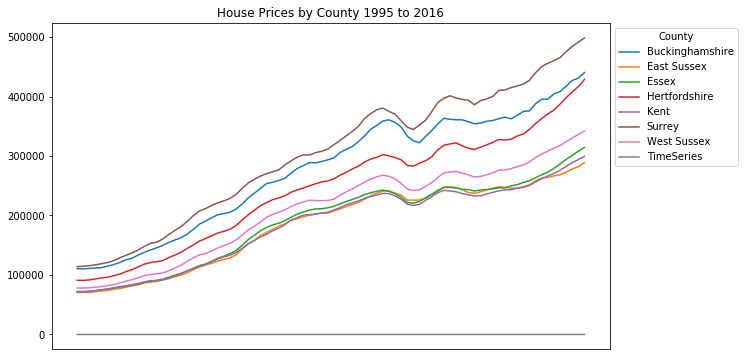

In [159]:
HousePrices.plot(figsize=(10,6),title="House Prices by County 1995 to 2016", xticks=range(0,0,4)).legend(title='County', bbox_to_anchor=(1, 1))

In [148]:
HousePrices.reset_index(inplace=True)
HousePrices['TimeSeries'] =HousePrices.index
HousePrices.head()

County,index,Buckinghamshire,East Sussex,Essex,Hertfordshire,Kent,Surrey,West Sussex,TimeSeries
0,1995,110569.1951,70788.62760,72573.52414,91105.27298,71226.80686,114066.3274,77912.30738,0
1,1996,110325.4499,70792.77013,72195.75916,90849.11440,71635.76212,114573.8128,78215.96325,1
2,1996,110977.0276,70336.55062,72620.79888,91728.81894,72368.96197,115667.2766,78425.08974,2
3,1996,111701.4616,72106.52274,73790.23989,93470.95943,73702.65060,117026.6841,79383.35424,3
4,1996,112480.7310,73157.89009,75005.24100,95061.98233,75169.00750,119018.6942,80707.23789,4


In [149]:
HousePrices.tail()

County,index,Buckinghamshire,East Sussex,Essex,Hertfordshire,Kent,Surrey,West Sussex,TimeSeries
79,2015,408335.6870,268302.3013,286695.1658,387077.2633,276278.0422,465307.3112,317469.9774,79
80,2015,417276.4081,273046.6280,294272.7251,398103.7177,282478.2311,475471.6338,324293.7121,80
81,2016,426953.9264,278049.7420,300932.9159,407579.0831,288739.9430,484059.1353,330020.5979,81
82,2016,430983.6254,282211.4589,307966.9895,416783.6712,293923.9935,491489.0897,336461.3183,82
83,2016,440358.9602,288873.4683,314500.8261,428638.8538,299492.2939,498436.1335,341929.8698,83


#### Linear regression by County

In [150]:
from sklearn import linear_model
regr_BK = linear_model.LinearRegression()
train_x = np.asanyarray(HousePrices[['TimeSeries']])
train_y_BK=np.asanyarray(HousePrices[['Buckinghamshire']])
# Train the model using the training sets
regr_BK.fit(train_x, train_y_BK)

# Make predictions using the testing set
y_pred_BK = regr_BK.predict(train_x)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 3965.09193182]]
Intercept:  [ 111820.92236768]


In [151]:
#Training data
train_y_ES = np.asanyarray(HousePrices[['East Sussex']])
train_y_EX = np.asanyarray(HousePrices[['Essex']])
train_y_HE = np.asanyarray(HousePrices[['Hertfordshire']])
train_y_KE = np.asanyarray(HousePrices[['Kent']])
train_y_SR = np.asanyarray(HousePrices[['Surrey']])
train_y_WS = np.asanyarray(HousePrices[['West Sussex']])

#Regression models
regr_ES = linear_model.LinearRegression()
regr_ES.fit(train_x, train_y_ES)

regr_EX = linear_model.LinearRegression()
regr_EX.fit(train_x, train_y_EX)

regr_HE = linear_model.LinearRegression()
regr_HE.fit(train_x, train_y_HE)

regr_KE = linear_model.LinearRegression()
regr_KE.fit(train_x, train_y_KE)

regr_SR = linear_model.LinearRegression()
regr_SR.fit(train_x, train_y_SR)

regr_WS = linear_model.LinearRegression()
regr_WS.fit(train_x, train_y_WS)

# Make predictions using the testing set
y_pred_ES = regr_ES.predict(train_x)

y_pred_EX = regr_EX.predict(train_x)

y_pred_HE = regr_HE.predict(train_x)

y_pred_KE = regr_KE.predict(train_x)

y_pred_SR = regr_SR.predict(train_x)

y_pred_WS = regr_WS.predict(train_x)


In [152]:
t=np.arange(84,101,4)
t_predict = t.reshape(-1,1)
y_pred_BK = regr_BK.predict(t_predict)
y_pred_BK

array([[ 444888.64464033],
       [ 460749.0123676 ],
       [ 476609.38009487],
       [ 492469.74782214],
       [ 508330.11554941]])

In [153]:
y_pred_ES = regr_ES.predict(t_predict)

y_pred_EX = regr_EX.predict(t_predict)

y_pred_HE = regr_HE.predict(t_predict)

y_pred_KE = regr_KE.predict(t_predict)

y_pred_SR = regr_SR.predict(t_predict)

y_pred_WS= regr_WS.predict(t_predict)


#### Plotting Buckinghamshire house price regression vs. real data

Text(0,0.5,'House Prices')

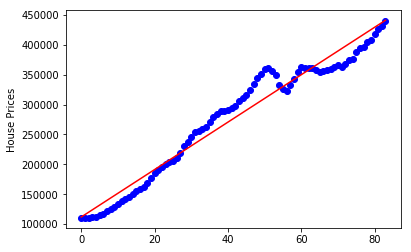

In [154]:
import matplotlib.pyplot as plt
plt.scatter(HousePrices.TimeSeries, HousePrices.Buckinghamshire,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

plt.ylabel("House Prices")

#### Plotting predicted house prices between 2016 and 2020 by county

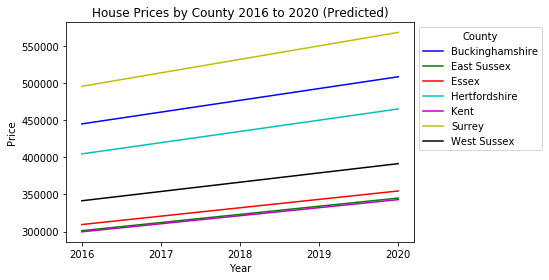

In [155]:

t_years=['2016','2017','2018','2019','2020']
plt.plot(t_years, y_pred_BK,  color='b')
plt.plot(t_years, y_pred_ES,  color='g')
plt.plot(t_years, y_pred_EX,  color='r')
plt.plot(t_years, y_pred_HE,  color='c')
plt.plot(t_years, y_pred_KE,  color='m')
plt.plot(t_years, y_pred_SR,  color='y')
plt.plot(t_years, y_pred_WS,  color='k')
plt.legend(counties,title='County', bbox_to_anchor=(1, 1))
plt.ylabel('Price')
plt.xlabel('Year')
plt.title('House Prices by County 2016 to 2020 (Predicted)')
plt.tight_layout()
plt.show()

